In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
DATA_PATH = '../data/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
DATA_ROMANIA_PATH = '../data/Environment_Temperature_change_ROMANIA.csv'
data_frame = pd.read_csv(DATA_PATH, encoding='cp1252')
print(data_frame.shape)

(9656, 66)


In [3]:
country = 'Romania'
df = data_frame.loc[((data_frame.Area == country) & (data_frame.Element == 'Temperature change') & (data_frame.Months != 'Meteorological year') &
                     ( data_frame['Months Code'] >= 7001) & (data_frame['Months Code'] <= 7012)) ]
df.to_csv(DATA_ROMANIA_PATH, index=False )

df

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
6154,183,Romania,7001,January,7271,Temperature change,°C,-0.164,1.810,-6.143,...,-0.305,1.081,1.134,1.764,3.608,2.896,0.546,-2.680,3.590,1.186
6156,183,Romania,7002,February,7271,Temperature change,°C,1.070,-1.159,-1.901,...,1.086,-0.809,-5.220,2.789,3.190,1.568,6.388,2.201,0.826,3.258
6158,183,Romania,7003,March,7271,Temperature change,°C,2.669,-1.974,-2.377,...,1.162,0.865,1.742,0.066,4.336,1.706,2.814,4.436,-0.213,3.932
6160,183,Romania,7004,April,7271,Temperature change,°C,2.689,0.956,-0.157,...,0.949,0.418,2.425,2.365,1.379,0.035,3.148,0.010,5.036,1.254
6162,183,Romania,7005,May,7271,Temperature change,°C,-1.394,0.627,1.116,...,1.213,0.612,1.839,2.640,0.447,1.624,0.174,0.828,3.490,0.421
6164,183,Romania,7006,June,7271,Temperature change,°C,0.756,-0.994,0.616,...,1.133,1.159,2.869,1.452,0.084,1.107,2.283,2.211,2.061,3.712
6166,183,Romania,7007,July,7271,Temperature change,°C,-0.544,-0.665,1.533,...,1.929,1.381,4.372,1.020,1.248,2.766,1.941,1.553,1.429,1.167
6168,183,Romania,7008,August,7271,Temperature change,°C,-0.058,1.716,1.941,...,2.976,1.652,2.830,2.347,1.476,3.019,1.504,3.041,3.264,2.972
6170,183,Romania,7009,September,7271,Temperature change,°C,0.497,-0.093,1.667,...,0.175,3.210,2.930,-0.839,1.064,2.871,2.086,1.498,1.799,1.903
6172,183,Romania,7010,October,7271,Temperature change,°C,0.875,0.510,0.067,...,-2.149,-0.823,2.472,1.118,0.672,-0.023,-1.124,0.821,2.816,2.708


In [4]:
x, y = [], []
for an in range(1961, 2020):
    for luna in range(0, 12):
        x_point = (an - 1961 ) * 12 + luna
        y_point = df.iloc[luna][f'Y{an}']
        x.append(x_point)
        y.append(y_point)

Text(0.5, 1.0, 'Romania')

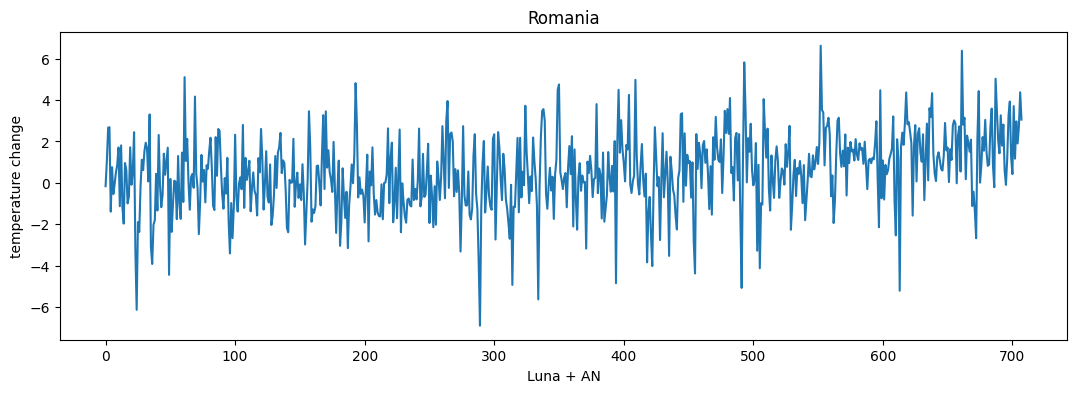

In [5]:

plt.figure(figsize=[13,4])
plt.plot(x, y)
plt.xlabel('Luna + AN')
plt.ylabel('temperature change')
# plt.xticks(year_columns[::3])
plt.title(country)

Text(0.5, 1.0, 'Romania')

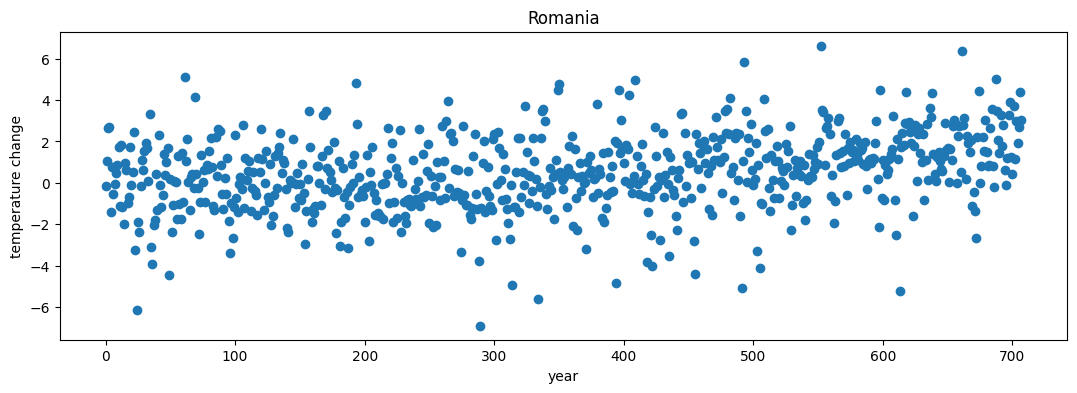

In [6]:
plt.figure(figsize=[13,4])
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('temperature change')
# plt.xticks(year_columns[::3])
plt.title(country)

Text(0.5, 1.0, 'Romania')

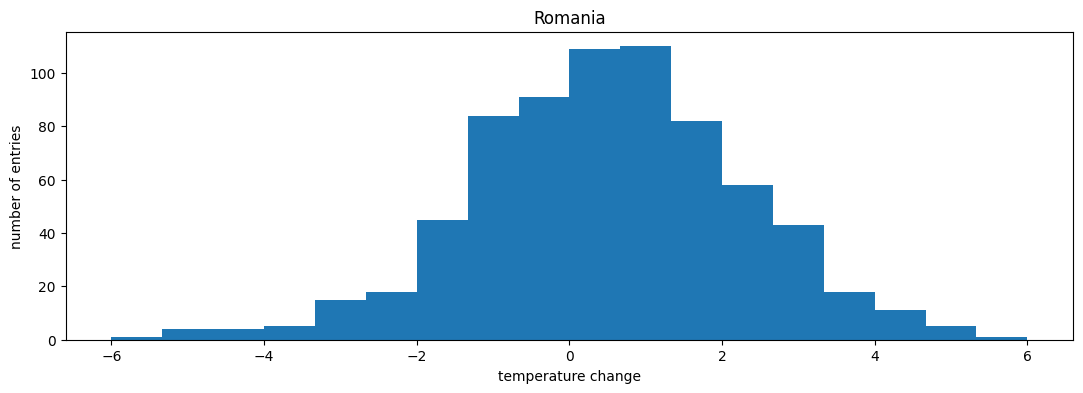

In [7]:
plt.figure(figsize=[13,4])
bin_range = (-6,6)
bin_count = 18
hist, bin_edges = np.histogram(y, bins=bin_count, range=bin_range)

plt.hist(bin_edges[:-1], bin_edges, weights=hist)
plt.xlabel('temperature change')
plt.ylabel('number of entries')
plt.title(country)

In [8]:
# (0 -> 720)   -> y
# predict(Luna, an) -> model((an - 1961 * 12) + luna)

In [9]:
inputs, targets = [], []
for an in range(1961, 2020):
    for luna in range(0, 12):
        x_point = luna
        y_point = an
        z_point = df.iloc[luna][f'Y{an}']
        inputs.append([x_point, y_point])
        targets.append([z_point])

In [10]:
from sklearn.model_selection import train_test_split


inputs = torch.tensor(inputs, dtype=torch.float32)
targets = torch.tensor(targets, dtype=torch.float32)


#train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    #inputs, targets, test_size=0.2, random_state=42)

train_inputs, test_inputs, train_targets, test_targets = train_test_split(
    inputs, targets, test_size=0.2, random_state=42)

In [11]:
max_train_input = torch.max(train_inputs[:, 1])
min_train_input = torch.min(train_inputs[:, 1])
train_inputs[:, 1] = (train_inputs[:, 1] - min_train_input) / (max_train_input - min_train_input)
test_inputs[:, 1] = (test_inputs[:, 1] - min_train_input) / (max_train_input - min_train_input)
train_inputs

tensor([[6.0000, 0.7414],
        [0.0000, 0.0345],
        [0.0000, 0.6897],
        ...,
        [6.0000, 0.3793],
        [3.0000, 0.6207],
        [6.0000, 0.1379]])

In [25]:
print(min_train_input)
print(max_train_input)
print(train_inputs[:50])

tensor(1961.)
tensor(2019.)
tensor([[ 6.0000,  0.7414],
        [ 0.0000,  0.0345],
        [ 0.0000,  0.6897],
        [ 2.0000,  0.4483],
        [11.0000,  0.3276],
        [ 1.0000,  0.4138],
        [ 0.0000,  0.4310],
        [ 2.0000,  0.1552],
        [10.0000,  0.1034],
        [ 3.0000,  0.0690],
        [ 3.0000,  0.3276],
        [ 3.0000,  0.8103],
        [ 7.0000,  0.7241],
        [ 6.0000,  0.4483],
        [ 8.0000,  0.9483],
        [ 2.0000,  0.7241],
        [ 8.0000,  0.3448],
        [ 6.0000,  0.0172],
        [10.0000,  0.6034],
        [ 1.0000,  0.7759],
        [ 2.0000,  0.7759],
        [ 2.0000,  0.4138],
        [ 1.0000,  0.0862],
        [11.0000,  0.4655],
        [ 4.0000,  0.5517],
        [ 5.0000,  0.0345],
        [ 2.0000,  0.8276],
        [11.0000,  0.3793],
        [ 4.0000,  0.3621],
        [ 0.0000,  0.6379],
        [ 4.0000,  0.6379],
        [10.0000,  0.8276],
        [ 6.0000,  0.8621],
        [ 4.0000,  0.5000],
        [ 1.0000,  0

We normalized the years by min-max normalization

In [12]:
print("Length of train set: " + str(len(train_targets)))

train_targets_negative = [el for el in train_targets if el < 0]

print("Length of train set with negative values as a result: " + str(len(train_targets_negative)))
print("The train data is good proportioned!")

Length of train set: 566
Length of train set with negative values as a result: 215
The train data is good proportioned!


In [13]:
torch.cuda.is_available()

False

In [14]:
from models.ANN_v2 import TempChangeNN

# ax.contour3D(x,y, lambda x,y:  df.iloc[x][f'Y{y}'] , 50, cmap = 'binary')
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
model = TempChangeNN().to(DEVICE)

We changed the ANN model such that now it predicts negative values. We added 2 layers and changed the activation function from LeakyReLu to ELU.

In [18]:

from models.checkpoint import save_checkpoint
from torch.optim import Adam
import torch

LEARNING_RATE = 1e-4
num_epochs = 1000
batch_size = 16
loss_fn = torch.nn.MSELoss()
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
# scaler = torch.cuda.amp.GradScaler()

total_loss = 0.0
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(0, len(inputs), batch_size):
        # Get the input and target batches
        input_batch = inputs[i:i+batch_size]
        target_batch = targets[i:i+batch_size]
        # Forward pass
        output_batch = model(input_batch)

        loss = loss_fn(output_batch, target_batch)
        # Backward pass
        loss.backward()
        # Optimize
        optimizer.step()
        epoch_loss += loss.item()
        # Zero the gradients
        optimizer.zero_grad()

    # Print the loss for the current epoch
    avg_loss = epoch_loss / len(inputs)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    total_loss += avg_loss
print(f'Epoch total loss], Loss: {total_loss/num_epochs:.4f}')

# save checkpoint
checkpoint =  {"state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict()
           }
save_checkpoint(checkpoint)

Epoch [1/1000], Loss: 0.2176
Epoch [2/1000], Loss: 0.2168
Epoch [3/1000], Loss: 0.2167
Epoch [4/1000], Loss: 0.2166
Epoch [5/1000], Loss: 0.2165
Epoch [6/1000], Loss: 0.2164
Epoch [7/1000], Loss: 0.2163
Epoch [8/1000], Loss: 0.2162
Epoch [9/1000], Loss: 0.2162
Epoch [10/1000], Loss: 0.2161
Epoch [11/1000], Loss: 0.2161
Epoch [12/1000], Loss: 0.2161
Epoch [13/1000], Loss: 0.2161
Epoch [14/1000], Loss: 0.2160
Epoch [15/1000], Loss: 0.2160
Epoch [16/1000], Loss: 0.2160
Epoch [17/1000], Loss: 0.2160
Epoch [18/1000], Loss: 0.2160
Epoch [19/1000], Loss: 0.2160
Epoch [20/1000], Loss: 0.2160
Epoch [21/1000], Loss: 0.2159
Epoch [22/1000], Loss: 0.2159
Epoch [23/1000], Loss: 0.2159
Epoch [24/1000], Loss: 0.2159
Epoch [25/1000], Loss: 0.2159
Epoch [26/1000], Loss: 0.2159
Epoch [27/1000], Loss: 0.2159
Epoch [28/1000], Loss: 0.2159
Epoch [29/1000], Loss: 0.2159
Epoch [30/1000], Loss: 0.2159
Epoch [31/1000], Loss: 0.2159
Epoch [32/1000], Loss: 0.2159
Epoch [33/1000], Loss: 0.2159
Epoch [34/1000], Lo

Changes: learning rate: from 10^-4^ to 10^-3^, batch size: from 16 to 64, epoch from 2000 to 1000.
Results: a smaller loss, from 0.2273 to 0.0611

In [26]:
def predict(net, input_batch):
    net.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient calculation for inference
        output_batch = net(input_batch)

    return output_batch.squeeze().tolist()

# Predict the temperature changes for the validation set
print(test_inputs[:15])
predicted_temp_changes = predict(model, test_inputs)

# Print the predicted temperature changes and the actual temperature changes
for i, (pred, actual) in enumerate(zip(predicted_temp_changes, test_targets.squeeze().tolist())):
    print(f"Validation Example {i+1}: Predicted: {pred:.2f}, Actual: {actual:.2f}")


tensor([[0.0000, 0.1724],
        [7.0000, 0.3448],
        [0.0000, 0.4655],
        [0.0000, 0.2931],
        [3.0000, 0.8621],
        [8.0000, 0.5000],
        [9.0000, 0.1034],
        [6.0000, 0.0690],
        [8.0000, 0.7241],
        [8.0000, 0.8103],
        [1.0000, 0.6552],
        [8.0000, 0.2931],
        [6.0000, 0.1034],
        [3.0000, 0.5862],
        [3.0000, 0.7759]])
Validation Example 1: Predicted: 0.43, Actual: 2.61
Validation Example 2: Predicted: -1.30, Actual: -0.58
Validation Example 3: Predicted: 0.47, Actual: 3.73
Validation Example 4: Predicted: 0.45, Actual: 0.55
Validation Example 5: Predicted: 0.45, Actual: 0.42
Validation Example 6: Predicted: -1.72, Actual: -1.18
Validation Example 7: Predicted: -2.75, Actual: 2.18
Validation Example 8: Predicted: -1.05, Actual: 0.05
Validation Example 9: Predicted: -1.48, Actual: -0.27
Validation Example 10: Predicted: -1.39, Actual: -0.61
Validation Example 11: Predicted: 0.48, Actual: 0.67
Validation Example 12: Pr

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets.squeeze().tolist(),predicted_temp_changes )

5.618567834533051

We improved the error value from 5.8419 to 3.6032